In [6]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Guych\Documents\hybridge\ia\aprendizaje_supervisado\data\titanic.csv')

In [7]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.500,NaN,S


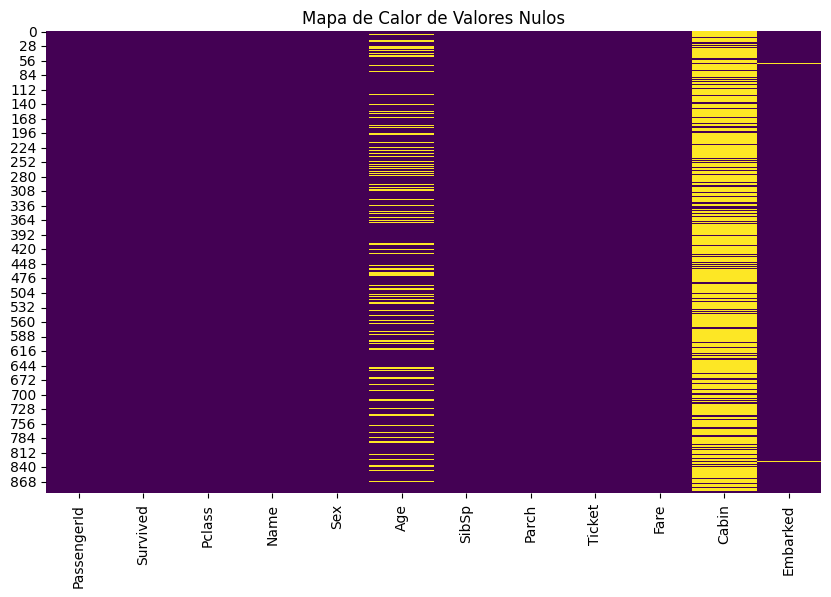

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataframe se llama 'df'
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [9]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


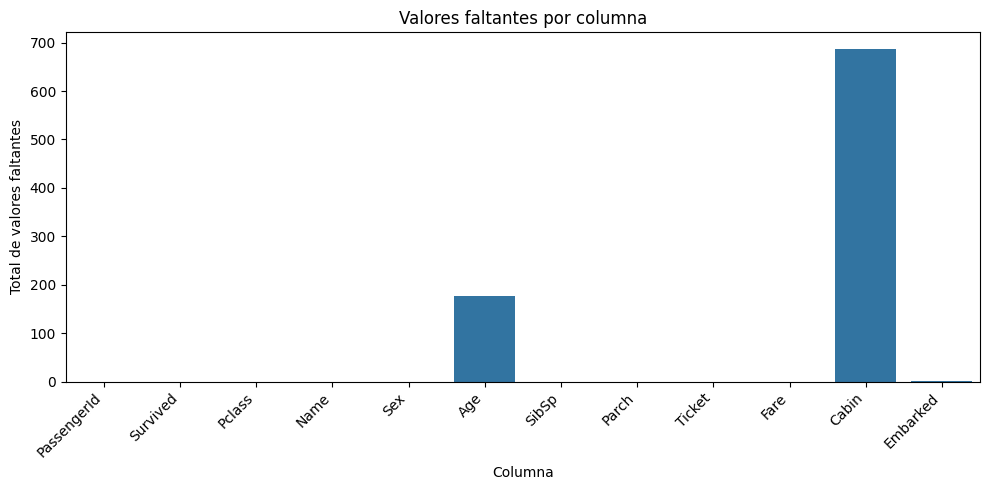

In [11]:
# Conteo de faltantes por columna
missing_df = (
    df.isna().sum()
      .reset_index()
      .rename(columns={"index": "columna", 0: "faltantes"})
)

plt.figure(figsize=(10,5))
sns.barplot(data=missing_df, x="columna", y="faltantes")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Columna")
plt.ylabel("Total de valores faltantes")
plt.title("Valores faltantes por columna")
plt.tight_layout()
plt.show()

In [12]:
df.drop('Cabin', axis = 1, inplace = True)

In [15]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)   # sin inplace


In [17]:
import io
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB



In [19]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [20]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [21]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [22]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [23]:
df.to_csv('./data/titanic_clean.csv', index=False)